### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZIO 11.3:</span> Supervised Machine Learning: funzione trigonometrica in 2D

Si continua il discroso dei due esercizi precedenti 11.1 ed 11.2, ma per una funzione trigonometrica da $\mathbb{R}^2 \to \mathbb{R}$
$$
f(x,y) = \sin(x^2+y^2)
$$
per $x \in [-\frac{3}{2},\frac{3}{2}]$ e $y \in [-\frac{3}{2},\frac{3}{2}]$

Creazione dei dati di training e di validation

In [95]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-3./2, 3./2, 5000)
y_train = np.random.uniform(-3./2, 3./2, 5000)

x_valid = np.random.uniform(-3./2, 3./2, 500)
y_valid = np.random.uniform(-3./2, 3./2, 500)


sigma = 0.1 # noise standard deviation

z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) #DATI DI TRAINING
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma) #DATI DI VALIDATION

Si pone su un grafico 3D la funzione modello (che è 2D), ed il validation dataset

<IPython.core.display.Javascript object>


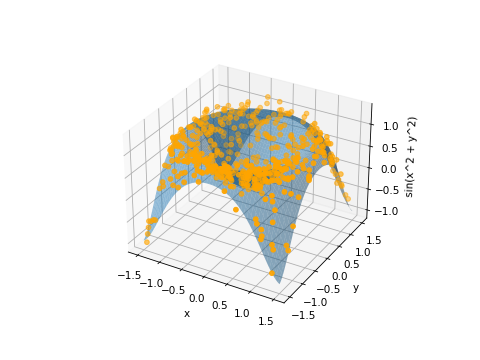

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crea una figura e un assi tridimensionali
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crea i valori di x e y nell'intervallo desiderato
x = np.linspace(-3./2, 3./2, 100)
y = np.linspace(-3./2, 3./2, 100)

# Crea una griglia di coordinate (x, y)
X, Y = np.meshgrid(x, y)

# Calcola i valori di z (funzione f(x, y))
Z = np.sin(X**2 + Y**2)

# Disegna la superficie
ax.plot_surface(X, Y, Z, alpha = 0.5, label='Target')

# Aggiungi lo scatterplot
ax.scatter(x_valid, y_valid, z_valid, c='orange', marker='o', label='Validation data')

# Aggiungi etichette agli assi
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('sin(x^2 + y^2)')

# Mostra il grafico
plt.show()

Si è quindi creata e allenata la rete densa.

In [99]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(150, input_shape=(2,), activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 150)               450       
                                                                 
 dense_89 (Dense)            (None, 80)                12080     
                                                                 
 dense_90 (Dense)            (None, 10)                810       
                                                                 
 dense_91 (Dense)            (None, 1)                 11        
                                                                 
Total params: 13,351
Trainable params: 13,351
Non-trainable params: 0
_________________________________________________________________


In [100]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=np.column_stack((x_train, y_train)), y=z_train,
          batch_size=40, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(np.column_stack((x_valid, y_valid)), z_valid))

Epoch 1/50
125/125 [==============================] - 1s 7ms/step - loss: 0.1811 - mse: 0.1811 - val_loss: 0.1334 - val_mse: 0.1334
Epoch 2/50
125/125 [==============================] - 1s 4ms/step - loss: 0.1208 - mse: 0.1208 - val_loss: 0.0940 - val_mse: 0.0940
Epoch 3/50
125/125 [==============================] - 1s 4ms/step - loss: 0.0723 - mse: 0.0723 - val_loss: 0.0480 - val_mse: 0.0480
Epoch 4/50
125/125 [==============================] - 1s 5ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 5/50
125/125 [==============================] - 1s 4ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 6/50
125/125 [==============================] - 1s 4ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 7/50
125/125 [==============================] - 1s 4ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 8/50
125/125 [==============================] - 0s 4ms/step - loss: 0.

In [101]:
# Evaluate the model
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score)

16/16 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127

Test loss: [0.012691413052380085, 0.012691413052380085]


### <span style="color:blue"> GRAFICO A) </span> Funzione di costo

Terminata la fase di training della rete sono stati graficati gli andamenti della funzione di costo dei dati di train e test in funzione dell'epoca.

<IPython.core.display.Javascript object>


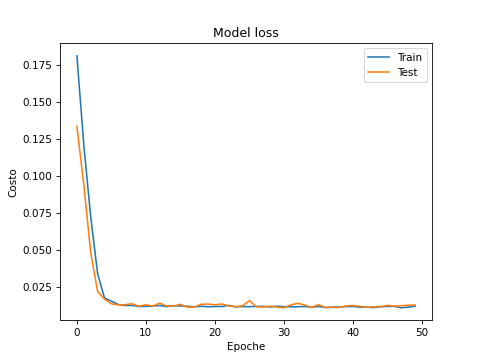

In [102]:
import matplotlib.pyplot as plt
plt.figure() 
## Plot training & validation loss values
plt.plot( history.history['loss'])
plt.plot( history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoche')
plt.ylabel('Costo')
plt.legend(['Train', 'Test'])
plt.show()

### <span style="color:green"> GRAFICO B) </span>: Predizione entro il dominio di training

<IPython.core.display.Javascript object>


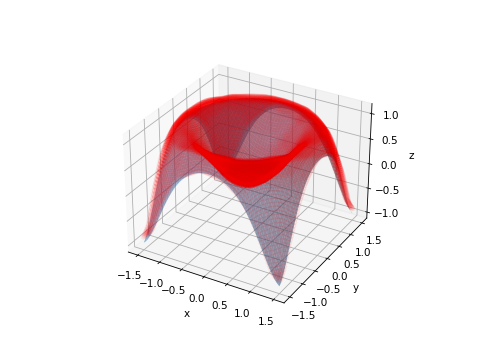

313/313 [==============================] - 1s 2ms/step


In [103]:
import matplotlib.pyplot as plt
# Crea una figura e un assi tridimensionali
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crea i valori di x e y nell'intervallo desiderato
x = np.linspace(-3./2, 3./2, 100)
y = np.linspace(-3./2, 3./2, 100)

# Crea una griglia di coordinate (x, y)
X, Y = np.meshgrid(x, y)

# Calcola i valori di z (funzione f(x, y))
Z = np.sin(X**2 + Y**2)

# Disegna la superficie continua
ax.plot_surface(X, Y, Z, alpha=0.5, label='Target')

# Predict the function values using the trained model
z_pred = model.predict(np.column_stack((X.flatten(), Y.flatten())))
z_pred = z_pred.reshape(X.shape)

# Disegna i punti predetti dalla rete neurale come scatterplot
ax.scatter(X, Y, z_pred, c='red', marker='o', alpha=0.05, label='Predicted') # Dimensione punti piccoli per vedere meglio funzione modello sotto

# Imposta etichette degli assi e titolo del grafico
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Mostra il grafico
plt.show()